# Buffon's Needle

Buffon's Needle is a classic Monte Carlo problem. In this notebook, we'll develop a "needle" class and use it to estimate $\pi$.  There is a great description of the problem in the wikipedia entry.

https://en.wikipedia.org/wiki/Buffon%27s_needle

In [1]:
# Package management
import math
import random
import matplotlib.pyplot as plt

The needle class will represent an individual needle.  Each instance will have unique $x$ and $y$ coordinates of the center of mass as well as an angle, $\theta$, relative to the $x$-axis.  The needle will also have a length.

The needle has methods crosscheck and endpoints:  

needle.crosscheck() will evaluate whether the needle is crossing a grid line and return a boolean.  

needle.endpoints() will return the $x,y$ coordinates of the endpoints for plotting

In [2]:
class needle:

    def __init__(self):
        self.x = random.random()*10.0
        self.y = random.random()*10.0
        self.theta = random.random()*2*math.pi
        self.length = 1.0

        
    def crosscheck(self):
        # This method checks to see if the needle
        # crosses the closest line.

        # Find closest line
        close_line = round(self.x)

        # Calculate projection along x-axis
        x_proj = math.cos(self.theta)*self.length/2

        #Check for crossing.  If the projection is greater
        # than the distance from the closest line then the 
        # needle crosses.
        if math.fabs(x_proj) > math.fabs(self.x - close_line):
            cross = 1
        else:
            cross = 0

        return cross


    def endpoints(self):

        # This method uses basic trigonometry to
        # calculate the endpoints of the needle.
        x_proj = math.cos(self.theta)*self.length/2
        y_proj = math.sin(self.theta)*self.length/2
        x =  [self.x + x_proj, self.x - x_proj]
        y =  [self.y + y_proj, self.y - y_proj]
        pts = [x,y]

        return pts

Let's test out the needle class with a basic simulation.  We'll drop a few needles and plot them on a grid, color coordinating needles that cross and needles that don't.

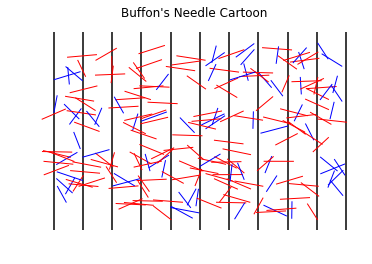

In [3]:
for i in range(200):

    # Instantiate needle
    n = needle()

    # Get the endpoints
    pts = n.endpoints()

    # Check for crossing and color code plot
    if n.crosscheck():
        plt.plot(pts[0],pts[1], c='red', linewidth = 1)
    else: 
        plt.plot(pts[0],pts[1], c='blue', linewidth = 1)
    
# Format plot 
xgrid = range(11)
plt.vlines(xgrid,-1,11) 
plt.axis('off')
plt.title('Buffon\'s Needle Cartoon')
plt.show()

That cartoon is nice, but now we'd like to study the system in more detail.  Fortunately, new simulations are easy to create.  Let's write a function which drops a specified number of needles and calculates an estimate for $\pi$.

In [4]:
def trial(num_drops): 

    # Intitialize number of needles which cross grid lines
    num_cross = 0

    # Loop through number of needles (num_drops)
    for num in range(num_drops):
        
        # Generate random needle drop 
        n=needle()

        # Increment num_cross
        num_cross = num_cross + n.crosscheck()

    # Calculate estimate of pi
    pi_est = (2*num_drops)/float(num_cross)

    return pi_est    

Test it out

In [5]:
trial(1000)


3.1545741324921135

Now we'll write a function to conduct a batch of trials, each with an identical number of needle drops.  It will provide a list with the $\pi$ estimates for each trial.

In [6]:
def batch(num_trials,num_drops):

    # This takes two integers, num_drops and num_trials,
    # and performs a batch of trials with the same number
    # needle drops. It returns a list with the estimates
    # of pi for each trial.
 
    print("Initiating ",num_trials," trials of ",num_drops, " needles.")
    
    # Intialize list
    estimates = []

    # Loop for trials
    for i in range(num_trials):

        pi_est = trial(num_drops)

        estimates.append(pi_est)

        if (i+1)%10 == 0:
            print("Trial ",str(i+1)," complete")

    return estimates

Test it out.  Go ahead and play with the number of trials and the number of needle drops.

In [7]:
batch(20,1000)

Initiating  20  trials of  1000  needles.
Trial  10  complete
Trial  20  complete


[3.0349013657056148,
 3.10077519379845,
 3.189792663476874,
 3.179650238473768,
 3.0959752321981426,
 3.1695721077654517,
 3.1446540880503147,
 3.1055900621118013,
 3.1201248049921997,
 3.1298904538341157,
 3.1847133757961785,
 3.1496062992125986,
 3.2051282051282053,
 3.0721966205837172,
 2.9895366218236172,
 3.2102728731942216,
 3.0395136778115504,
 3.115264797507788,
 3.048780487804878,
 3.1446540880503147]

Let's make a nice color scheme for the histograms.  This is from http://www.randalolson.com/.

In [8]:
def color_maker():
    
    # These are the "Tableau 20" colors as RGB.    
    tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
    # Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
    for i in range(len(tableau20)):    
        r, g, b = tableau20[i]    
        tableau20[i] = (r / 255., g / 255., b / 255.)
        
    return tableau20

Now we're ready for batch simulations.  First initialize some variables.

In [9]:
# Set color scheme
t20 = color_maker()    

# Define the number of trials  in each batch  
num_trials = 50

# Intialize list of legend labels  
legend_labels = []

Define number of needles per trial.  We'll loop through this list running batches with different numbers of needle drops to compare the distribution of the estimates.

In [10]:
num_drops = [10, 100, 1000]

Loop through num_drops, call batch function, and make histogram with output.

In [11]:
for k in range(len(num_drops)):

    # Run a batch of trials
    estimates = batch(num_trials,num_drops[k])

    # Plot distribution of estimates on histogram
    plt.hist(estimates,facecolor = t20[k])
    
    # Update legend labels
    legend_labels.append(str(num_drops[k]))

Initiating  50  trials of  10  needles.
Trial  10  complete
Trial  20  complete
Trial  30  complete
Trial  40  complete
Trial  50  complete
Initiating  50  trials of  100  needles.
Trial  10  complete
Trial  20  complete
Trial  30  complete
Trial  40  complete
Trial  50  complete
Initiating  50  trials of  1000  needles.
Trial  10  complete
Trial  20  complete
Trial  30  complete
Trial  40  complete
Trial  50  complete


Format the plot.

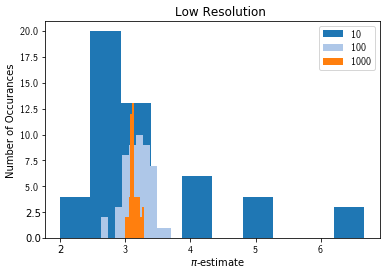

In [12]:
# Use Tex formatting for text in the plot
plt.rc('text', usetex=True)

plt.legend(legend_labels)
plt.xlabel('$\pi$-estimate')
plt.ylabel('Number of Occurances')
plt.title('Low Resolution')
plt.show()

We already saw the relationship between the number of needles in a trial and the distribution of a batch of trials.  Let's zoom in and see how close our estimate gets as we increase the number of needles.

In [13]:
num_drops = [10000, 100000, 1000000]    

In [14]:
# Reset legend labels  
legend_labels = []

Run the simulation again.

In [15]:
for k in range(len(num_drops)):

    # Run a batch of trials
    estimates = batch(num_trials,num_drops[k])

    # Update legend labels
    plt.hist(estimates,facecolor = t20[k]) 

    # Plot distribution of estimates on histogram
    legend_labels.append(str(num_drops[k]))

Initiating  50  trials of  10000  needles.
Trial  10  complete
Trial  20  complete
Trial  30  complete
Trial  40  complete
Trial  50  complete
Initiating  50  trials of  100000  needles.
Trial  10  complete
Trial  20  complete
Trial  30  complete
Trial  40  complete
Trial  50  complete
Initiating  50  trials of  1000000  needles.
Trial  10  complete
Trial  20  complete
Trial  30  complete
Trial  40  complete
Trial  50  complete


Format the plot.

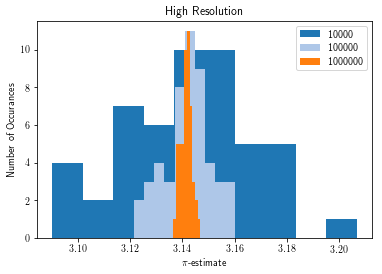

In [16]:
# Use Tex formatting for text in the plot
plt.rc('text', usetex=True) 

plt.legend(legend_labels)
plt.xlabel('$\pi$-estimate')
plt.ylabel('Number of Occurances')
plt.title('High Resolution')
plt.show()